# 캐글 - Shelter Animal Outcomes

# https://www.kaggle.com/competitions/shelter-animal-outcomes

# 동물 보호소에서 동물이 입양되는지, 죽는지, 안락사되는지, 주인에게 돌아가는지, 이전되는지

In [1]:
import pandas as pd
import numpy as np

# 1. 캐글 데이터 불러오기

In [2]:
import os

os.environ['KAGGLE_USERNAME'] = ''
os.environ['KAGGLE_KEY'] = ''

In [3]:
!kaggle competitions download -c shelter-animal-outcomes
!unzip '*.zip'

  0% 0.00/716k [00:00<?, ?B/s]
100% 716k/716k [00:00<00:00, 84.6MB/s]
Archive:  shelter-animal-outcomes.zip
  inflating: sample_submission.csv.gz  
  inflating: test.csv.gz             
  inflating: train.csv.gz            


In [4]:
train = pd.read_csv('train.csv.gz')
train.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [5]:
test = pd.read_csv('test.csv.gz')
test.head()

,ID,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,1,Summer,2015-10-12 12:15:00,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White
1,2,Cheyenne,2014-07-26 17:59:00,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan
2,3,Gus,2016-01-13 12:20:00,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby
3,4,Pongo,2013-12-28 18:12:00,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor
4,5,Skooter,2015-09-24 17:59:00,Dog,Neutered Male,2 years,Miniature Poodle Mix,White


In [9]:
# train데이터와 test데이터 합치기

alldata = pd.concat([train, test])
alldata.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,ID
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,NaN
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,NaN
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,NaN
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,NaN
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,NaN


- output칼럼 = OutcomeType

In [10]:
alldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38185 entries, 0 to 11455
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AnimalID        26729 non-null  object 
 1   Name            27269 non-null  object 
 2   DateTime        38185 non-null  object 
 3   OutcomeType     26729 non-null  object 
 4   OutcomeSubtype  13117 non-null  object 
 5   AnimalType      38185 non-null  object 
 6   SexuponOutcome  38184 non-null  object 
 7   AgeuponOutcome  38161 non-null  object 
 8   Breed           38185 non-null  object 
 9   Color           38185 non-null  object 
 10  ID              11456 non-null  float64
dtypes: float64(1), object(10)
memory usage: 3.5+ MB


# 2. 날짜 칼럼 전처리

In [11]:
alldata['DateTime'] = pd.to_datetime(alldata['DateTime'])     # DateTime 칼럼 형식을 datetime 형식으로 변경

# year, month, day, hour, weekday 칼럼 추가
alldata['year'] = alldata['DateTime'].dt.year
alldata['month'] = alldata['DateTime'].dt.month
alldata['day'] = alldata['DateTime'].dt.day
alldata['hour'] = alldata['DateTime'].dt.hour
alldata['weekday'] = alldata['DateTime'].dt.weekday     # weekday는 0이 월요일

alldata.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,ID,year,month,day,hour,weekday
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,NaN,2014,2,12,18,2
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,NaN,2013,10,13,12,6
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,NaN,2015,1,31,12,5
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,NaN,2014,7,11,19,4
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,NaN,2013,11,15,12,4


# 3. 새로 생성한 날짜 관련 칼럼의 유용성 확인

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


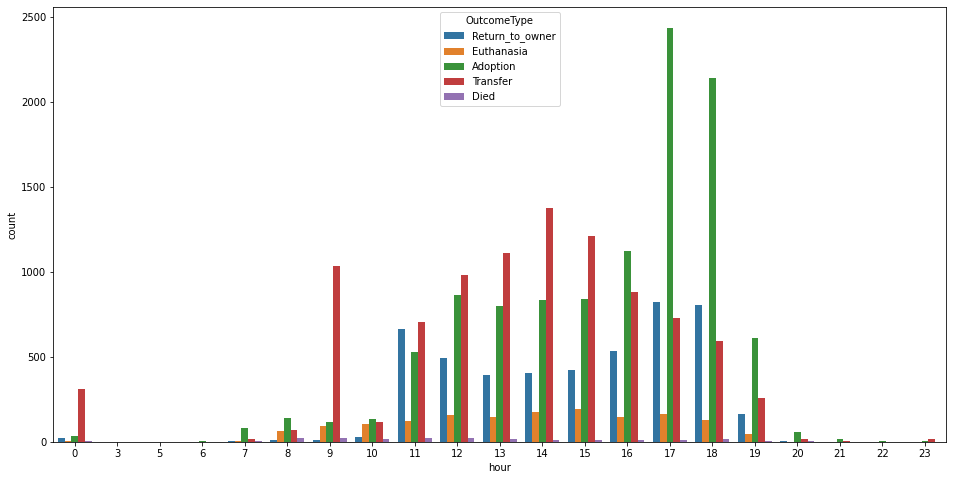

In [13]:
plt.figure(figsize = (16, 8))
sns.countplot(alldata['hour'], hue = alldata['OutcomeType'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


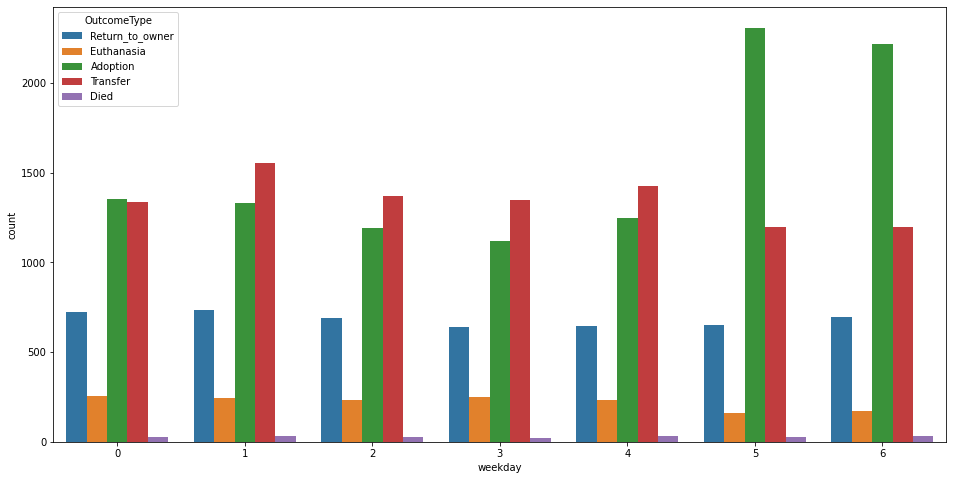

In [14]:
plt.figure(figsize = (16, 8))
sns.countplot(alldata['weekday'], hue = alldata['OutcomeType'])

# 4. 불필요한 칼럼 제거

In [15]:
alldata2 = alldata.drop(columns = ['AnimalID', 'OutcomeSubtype', 'DateTime', 'OutcomeType', 'ID'])
alldata2.head()

,Name,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,year,month,day,hour,weekday
0,Hambone,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,2014,2,12,18,2
1,Emily,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,2013,10,13,12,6
2,Pearce,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,2015,1,31,12,5
3,NaN,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,2014,7,11,19,4
4,NaN,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,2013,11,15,12,4


# 5. AgeuponOutcome 칼럼 전처리

In [16]:
alldata['AgeuponOutcome'].unique()     # 칼럼 변수명 확인

array(['1 year', '2 years', '3 weeks', '1 month', '5 months', '4 years',
       '3 months', '2 weeks', '2 months', '10 months', '6 months',
       '5 years', '7 years', '3 years', '4 months', '12 years', '9 years',
       '6 years', '1 weeks', '11 years', '4 weeks', '7 months', '8 years',
       '11 months', '4 days', '9 months', '8 months', '15 years',
       '10 years', '1 week', '0 years', '14 years', '3 days', '6 days',
       '5 days', '5 weeks', '2 days', '16 years', '1 day', '13 years',
       nan, '17 years', '18 years', '19 years', '20 years', '22 years'],
      dtype=object)

In [17]:
# AgeuponOutcome 칼럼 단위를 '일'로 통일시키기 위한 age 함수

def age(x):
  if pd.isnull(x):
    return -1

  num = x.split()[0]     # AgeuponOutcome 칼럼의 변수들이 '숫자 문자'식으로 되어 있으므로 숫자만 따로 분리
  num = int(num)
  if 'year' in x:
    return num * 365
  elif 'month' in x:
    return num * 30
  elif 'week' in x:
    return num * 7
  else:
    return num

In [18]:
alldata2['AgeuponOutcome'] = alldata2['AgeuponOutcome'].apply(age)     # age함수 적용
alldata2.head()

,Name,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,year,month,day,hour,weekday
0,Hambone,Dog,Neutered Male,365,Shetland Sheepdog Mix,Brown/White,2014,2,12,18,2
1,Emily,Cat,Spayed Female,365,Domestic Shorthair Mix,Cream Tabby,2013,10,13,12,6
2,Pearce,Dog,Neutered Male,730,Pit Bull Mix,Blue/White,2015,1,31,12,5
3,NaN,Cat,Intact Male,21,Domestic Shorthair Mix,Blue Cream,2014,7,11,19,4
4,NaN,Dog,Neutered Male,730,Lhasa Apso/Miniature Poodle,Tan,2013,11,15,12,4


# 6. Name 칼럼 전처리

In [19]:
# Name 칼럼은 이름의 유무에 따라 True, False로 변경

alldata2['Name'] = alldata2['Name'].notnull()     # 이름이 있으면 True, 없으면 False
alldata2.head()

,Name,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,year,month,day,hour,weekday
0,True,Dog,Neutered Male,365,Shetland Sheepdog Mix,Brown/White,2014,2,12,18,2
1,True,Cat,Spayed Female,365,Domestic Shorthair Mix,Cream Tabby,2013,10,13,12,6
2,True,Dog,Neutered Male,730,Pit Bull Mix,Blue/White,2015,1,31,12,5
3,False,Cat,Intact Male,21,Domestic Shorthair Mix,Blue Cream,2014,7,11,19,4
4,False,Dog,Neutered Male,730,Lhasa Apso/Miniature Poodle,Tan,2013,11,15,12,4


# 7. 문자형 칼럼 라벨 인코딩

In [20]:
from sklearn.preprocessing import LabelEncoder     # 문자형 칼럼을 숫자로 변환하기 위해 LabelEncoder 사용

le = LabelEncoder()

a = alldata2.columns[alldata2.dtypes == 'object']     # 문자형 칼럼만 선별

for i in a:
  alldata2[i] = le.fit_transform(list(alldata2[i]))     # for 반복문을 이용해 모든 문자형 칼럼 숫자로 변경. 이때 결측치로 인해 오류가 날 수 있으므로 list로 변경

alldata2.head()

,Name,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,year,month,day,hour,weekday
0,True,1,2,365,1482,146,2014,2,12,18,2
1,True,0,3,365,775,184,2013,10,13,12,6
2,True,1,2,730,1293,97,2015,1,31,12,5
3,False,0,1,21,775,47,2014,7,11,19,4
4,False,1,2,730,1101,311,2013,11,15,12,4


# 8. 결측치 채우기

In [21]:
alldata2 = alldata2.fillna(-1)

# 9. train2와 test2로 분리

In [22]:
train2 = alldata2[:len(train)]     # 앞에서부터 train갯수만큼을 train2로 분리
test2 = alldata2[len(train):]     # train갯수 이후부터 나머지를 test2로 분리

# 10. 모델링(모델 불러오기, 모델 선언, 학습, 결과예측)

In [24]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [25]:
from catboost import CatBoostClassifier

# 부스팅모델 사용(부스팅모델은 과대적합될 수 있으므로 하이퍼파라미터를 잘 적용해야 함)
# 카테고리 느낌 나는 데이터는 부스팅 모델이나 배깅모델(RandomForest 같은) 둘 중 하나 사용

cb = CatBoostClassifier(verbose = 10)     # verbose = 10은 결과 나오는 과정을 10개 단위로만 나오게 함
cb.fit(train2, train['OutcomeType'])
result = cb.predict_proba(test2)
result

Learning rate set to 0.093562
0:	learn: 1.4740328	total: 108ms	remaining: 1m 48s
10:	learn: 0.9884077	total: 710ms	remaining: 1m 3s
20:	learn: 0.8685972	total: 1.2s	remaining: 55.7s
30:	learn: 0.8240979	total: 1.79s	remaining: 55.8s
40:	learn: 0.8003360	total: 2.46s	remaining: 57.4s
50:	learn: 0.7875393	total: 2.95s	remaining: 54.8s
60:	learn: 0.7784272	total: 3.35s	remaining: 51.5s
70:	learn: 0.7716206	total: 3.84s	remaining: 50.2s
80:	learn: 0.7642203	total: 4.37s	remaining: 49.6s
90:	learn: 0.7593951	total: 5.01s	remaining: 50.1s
100:	learn: 0.7547788	total: 5.61s	remaining: 50s
110:	learn: 0.7497534	total: 6.19s	remaining: 49.6s
120:	learn: 0.7451050	total: 6.71s	remaining: 48.7s
130:	learn: 0.7403083	total: 7.27s	remaining: 48.2s
140:	learn: 0.7366497	total: 7.85s	remaining: 47.8s
150:	learn: 0.7322905	total: 8.46s	remaining: 47.6s
160:	learn: 0.7286400	total: 9.12s	remaining: 47.5s
170:	learn: 0.7244101	total: 9.56s	remaining: 46.3s
180:	learn: 0.7207893	total: 10.1s	remaining: 4

array([[2.35710467e-02, 8.47754842e-04, 4.57910937e-02, 1.49058724e-01,
        7.80731380e-01],
       [7.07091128e-01, 3.67759552e-04, 5.28884878e-03, 2.51261181e-01,
        3.59910829e-02],
       [3.66618762e-01, 9.69670857e-04, 1.42099391e-02, 1.62814649e-01,
        4.55386979e-01],
       ...,
       [7.84196667e-04, 4.81064084e-03, 1.35322426e-02, 1.05648377e-03,
        9.79816436e-01],
       [4.15345664e-01, 6.37692030e-04, 7.61263578e-03, 5.25185609e-01,
        5.12183993e-02],
       [5.78535697e-02, 1.04843213e-03, 1.33833211e-01, 6.46442436e-01,
        1.60822352e-01]])

# 11. 제출 양식 불러와서 결과 포함하고 결과물을 csv파일로 저장

In [26]:
# 제출 양식 불러오기

sub = pd.read_csv('sample_submission.csv.gz')
sub.head()

,ID,Adoption,Died,Euthanasia,Return_to_owner,Transfer
0,1,1,0,0,0,0
1,2,1,0,0,0,0
2,3,1,0,0,0,0
3,4,1,0,0,0,0
4,5,1,0,0,0,0


In [27]:
# 제출 양식에 결과 포함

sub.iloc[:, 1:] = result     # 다중분류대회이므로 sub.iloc[:, 1:] = result로 함
sub

,ID,Adoption,Died,Euthanasia,Return_to_owner,Transfer
0,1,0.023571,0.000848,0.045791,0.149059,0.780731
1,2,0.707091,0.000368,0.005289,0.251261,0.035991
2,3,0.366619,0.000970,0.014210,0.162815,0.455387
3,4,0.324449,0.000600,0.025366,0.096941,0.552645
4,5,0.426575,0.000231,0.002982,0.496205,0.074006
...,...,...,...,...,...,...
11451,11452,0.555587,0.001893,0.031453,0.004828,0.406239
11452,11453,0.000445,0.015087,0.029564,0.000395,0.954509
11453,11454,0.000784,0.004811,0.013532,0.001056,0.979816
11454,11455,0.415346,0.000638,0.007613,0.525186,0.051218


In [28]:
# 결과물을 csv파일로 저장

sub.to_csv('sub.csv', index = 0)     # index 불포함

# cf) 변수 중요도 확인

In [29]:
# 판다스 형식으로 변환 후 train2 칼럼명을 인덱스로 사용, 큰 수부터 내림차순으로 정렬

pd.Series(cb.feature_importances_, index = train2.columns).sort_values(ascending = False)

AgeuponOutcome    16.201066
SexuponOutcome    15.545068
hour              12.275585
day                9.228442
month              8.767035
Breed              8.548134
weekday            8.159093
Color              7.232146
Name               5.346014
year               4.492237
AnimalType         4.205180
dtype: float64

- 변수 중요도가 0 이상이면 조금씩이라도 도움 되는 칼럼
- 이 데이터에서 가장 중요한 칼럼은 AgeuponOutcome 칼럼

# 12. 결과 제출
- data -> output -> /kaggle/working -> sub.csv 다운로드
- data -> input -> (프로젝트 제목) -> more actions -> open in new tab
- late submission -> step1: csv 파일 제출 -> step2: 간단한 설명 -> make submission

## 등수
- 처음 베이스라인 작성 + 랜덤 포레스트 사용: 1220/1599
- catboost 사용: 835/1599
- age 칼럼 전처리 & 날짜 칼럼 추가: 397/1599
- name 칼럼 전처리: 375/1599